# Lab: Linear Regression

In [ ]:
! pip install scikit-learn pandas

In [63]:
from IPython.display import Image

# 주택 데이터셋 탐색

## 데이터프레임으로 주택 데이터셋 읽기

Description, which was previously available at: [https://archive.ics.uci.edu/ml/datasets/Housing](https://archive.ics.uci.edu/ml/datasets/Housing)

Attributes:
    
<pre>
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000s
</pre>

In [64]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-3rd-edition/'
                 'master/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [65]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


## 데이터셋의 중요 특징 시각화

`mlxtend`를 설치합니다.

In [ ]:
! pip install --upgrade mlxtend

In [66]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

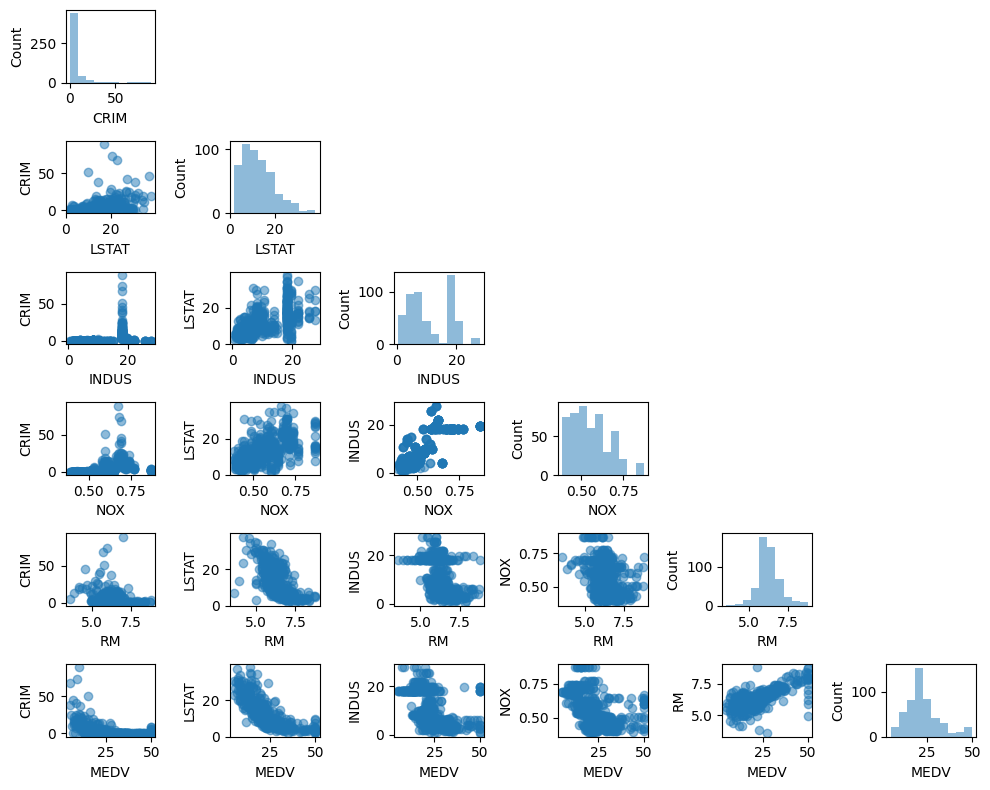

In [67]:
# 'CRIM', 'LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV' 변수를 이용해 scatterplotmatrix 출력 해보기

# list로 분석하고자 하는 변수의 이름을 넣어주면 사용 가능
cols = ['CRIM', 'LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

# 산점도(scatterplot) 그리기
scatterplotmatrix(df[cols].values, figsize=(10, 8), 
                  names=cols, alpha=0.5)
plt.tight_layout()
# plt.savefig('images/10_03.png', dpi=300)
plt.show()

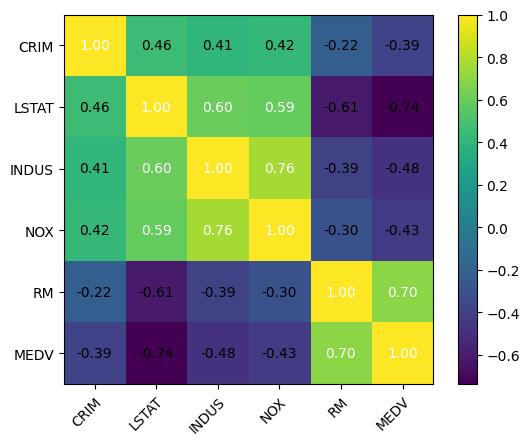

In [68]:
import numpy as np
from mlxtend.plotting import heatmap


cm = np.corrcoef(df[cols].values.T)
hm = heatmap(cm, row_names=cols, column_names=cols)

# plt.savefig('images/10_04.png', dpi=300)
plt.show()
# 1(정비례)이나 -1(반비례)에 가까울수록 연관관계가 있음

<br>
<br>

## Simple Linear Regression

In [69]:
# 두 변수를 설정
# X = 입력
# y = 출력 (집값)

X = df[['LSTAT']].values
y = df['MEDV'].values

In [70]:
from sklearn.preprocessing import StandardScaler

# 입력 데이터의 분포를 가우시안으로 변경
sc_x = StandardScaler()
sc_y = StandardScaler()

# fit_transform
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
slr = LinearRegression()

# fit 실시
y_pred = slr.fit(X, y)

print('기울기: %.3f' % slr.coef_[0])
print('절편: %.3f' % slr.intercept_)

기울기: -0.950
절편: 34.554


In [73]:
slr_std = LinearRegression()

y_pred_std = slr_std.fit(X_std, y_std)

print('기울기: %.3f' % slr_std.coef_[0])
print('절편: %.3f' % slr_std.intercept_)

기울기: -0.738
절편: -0.000


In [ ]:
X

In [ ]:
X_std

In [74]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return 

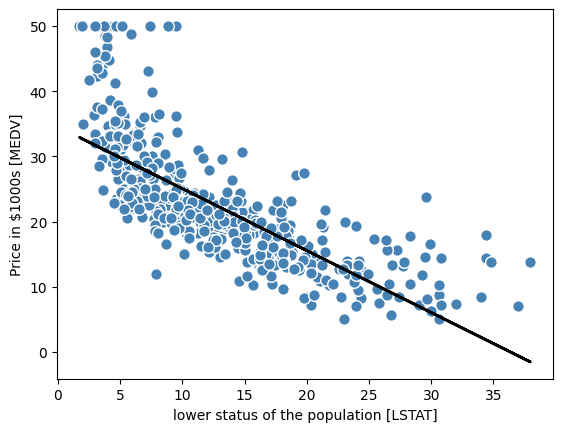

In [77]:
lin_regplot(X, y, slr)
plt.xlabel('lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')

# plt.savefig('images/10_07.png', dpi=300)
plt.show()

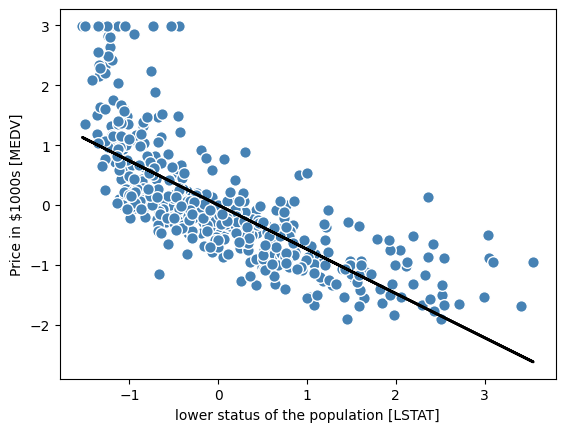

In [78]:
lin_regplot(X_std, y_std, slr_std)
plt.xlabel('lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')

# plt.savefig('images/10_07.png', dpi=300)
plt.show()

## Multiple Linear Regression

In [81]:
from sklearn.model_selection import train_test_split

# 모든 변수를 X로 설정
X = df.iloc[:, :-1].values
# 집값을 y로 설정
y = df['MEDV'].values

# train, test 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

데이터를 섞지 않은 것보다 섞은 것이 훈련이 잘됨

In [86]:
# 데이터 분리 상태 확인
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(152,)

In [87]:
slr = LinearRegression()
slr.fit(X_train, y_train)

y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

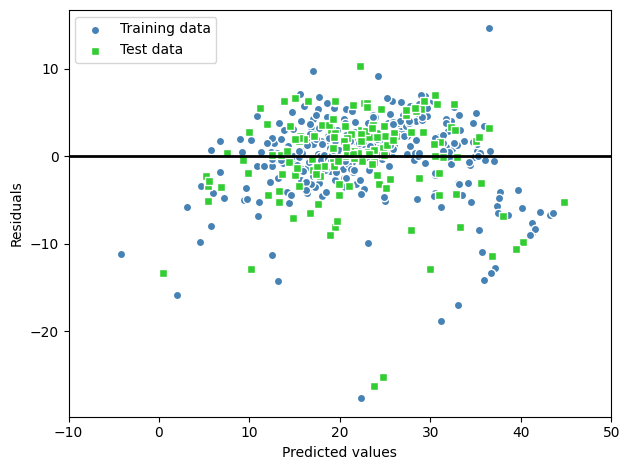

In [88]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()

# plt.savefig('images/10_09.png', dpi=300)
plt.show()

train 결과는 잘 나오지만 test 결과가 제대로 안 나오면 overfit 되었다고 함

In [89]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('훈련 MSE: %.3f, 테스트 MSE: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('훈련 R^2: %.3f, 테스트 R^2: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

훈련 MSE: 19.958, 테스트 MSE: 27.196
훈련 R^2: 0.765, 테스트 R^2: 0.673
